# 1.Introduction

This notebook is highly depend on **P. Lucey, J. F. Cohn, T. Kanade, J. Saragih, Z. Ambadar and I. Matthews, "The Extended Cohn-Kanade Dataset (CK+): A complete dataset for action unit and emotion-specified expression," 2010 IEEE Computer Society Conference on Computer Vision and Pattern Recognition - Workshops, San Francisco, CA, 2010, pp. 94-101.**

### 1.1 CK vs CK+
The [Cohn-Kanade AU-Coded Facial Expression Database](https://www.pitt.edu/~emotion/ck-spread.htm) is for research in automatic facial image analysis and synthesis and for perceptual studies. Cohn-Kanade is available in two versions and a third is in preparation.

- The CK (or DFAT) database contains 486 sequences across 97 subjects.
- Extended Cohn-Kanade (CK+) database added another 107 sequences as well as another 26 subjects.

### 1.2 The Extended Cohn-Kanade (CK+) Dataset

Facial behavior of 210 adults was recorded using two hardware synchronized Panasonic AG-7500 cameras. Participants were 18 to 50 years of age, 69% female, 81%, Euro-American, 13% Afro-American, and 6% other groups. Participants were instructed by an experimenter to perform a series of 23 facial displays; these included single action units and combinations of action units.Each display began and ended in a neutral face with any exceptions noted. Im- age sequences for frontal views and 30-degree views were digitized into either 640x490 or 640x480 pixel arrays with 8- bit gray-scale or 24-bit color values

For the CK+ distribution, we have augmented the dataset further to include 593 se- quences from 123 subjects (an additional 107 (22%) se- quences and 26 (27%) subjects). The image **sequence vary in duration (i.e. 10 to 60 frames)** and incorporate the onset (which is also the neutral frame) to peak formation of the facial expressions
![examples](images/examples.jpg)

All image data from the pool of **593 sequences** that had a nominal emotion label based on the subject’s impression of each of the **7 basic emotion categories: Anger,Contempt, Disgust, Fear, Happy, Sadness and Surprise.**


# 2. Data Exploratory 

### 2.1 Landmaker

In [1]:
import pandas as pd
import sys,os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt



In [2]:
import pandas as pd
def read_files_label(path):
    files_label = pd.DataFrame(columns=['files','label'])
    if os.path.isdir(path):
        for sub_path in os.listdir(path):
            sub_path = os.path.join(path,sub_path)
            if os.path.isdir(sub_path):
                for ssub in os.listdir(sub_path):
                    file_path = os.path.join(sub_path,ssub)
                    if os.path.isdir(file_path):
                        for file in os.listdir(file_path):
                            fo = open(os.path.join(file_path,file), "r+")
                            label = fo.readlines()
                            label = label[0].strip()
                            fo.close()
                            files_label = files_label.append({"files":file.replace("_emotion.txt",''), "label":int(label.replace(".0000000e+00",""))}, ignore_index=True)
    return files_label

In [3]:
# path = "D:/Projects/CK_plus/datasets/Emotion"
path = "/Users/lahaale/Downloads/Courses/AI/project/CK+/Emotion"
files_label = read_files_label(path)

In [4]:
files_label.head()

,files,label
0,S111_007_00000014,3
1,S111_001_00000014,7
2,S111_006_00000010,1
3,S129_012_00000011,5
4,S129_006_00000010,1


In [5]:
files_label.tail()

,files,label
322,S137_005_00000027,6
323,S108_008_00000013,5
324,S108_006_00000020,3
325,S108_005_00000022,6
326,S155_002_00000012,2


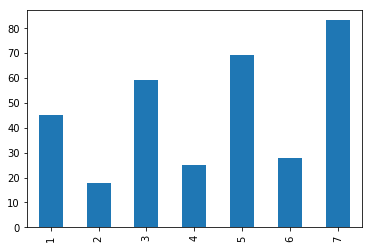

In [6]:
files_label.label.value_counts()[[1,2,3,4,5,6,7]].plot(kind="bar");

In [7]:
def check_file_number(rows):
    image_path = "/Users/lahaale/Downloads/Courses/AI/project/CK+/cohn-kanade-images"
    emotion_path = rows
    emotion_path = emotion_path.split("_")
    images = os.path.join(image_path,emotion_path[0],emotion_path[1])
    return len(os.listdir(images))

In [8]:
check_file_number("S111_007_00000014")

14

In [9]:
files_label["num"]=files_label.files.apply(check_file_number)

In [10]:
files_label.head()

,files,label,num
0,S111_007_00000014,3,14
1,S111_001_00000014,7,14
2,S111_006_00000010,1,10
3,S129_012_00000011,5,11
4,S129_006_00000010,1,10


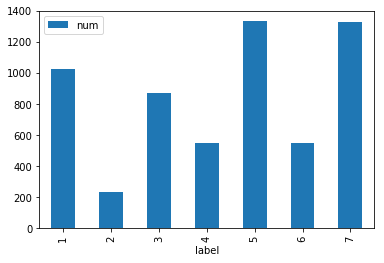

In [11]:
files_label.groupby("label").sum().plot(kind="bar");

### 2.2  FACS

### 2.3 Emotional Label

# 3. Base Line Models

### 3.1 Active Appearance Model (AAM) 
### 3.2  Support Vector Machines (SVMs)